<a href="https://colab.research.google.com/github/sanjaysaini383/Machine-Learning-Projects/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/new_traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
train, test = train_test_split(df,test_size=0.1,random_state=1992)
print("Shape of train: ",train.shape)
print("Shape of test",test.shape)

Shape of train:  (2678, 9)
Shape of test (298, 9)


In [ ]:
train.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
test.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 828 to 2313
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2678 non-null   object
 1   Date               2678 non-null   int64 
 2   Day of the week    2678 non-null   object
 3   CarCount           2678 non-null   int64 
 4   BikeCount          2678 non-null   int64 
 5   BusCount           2678 non-null   int64 
 6   TruckCount         2678 non-null   int64 
 7   Total              2678 non-null   int64 
 8   Traffic Situation  2678 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.2+ KB


None

test
<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 1338 to 896
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               298 non-null    object
 1   Date               298 non-null    int64 
 2   Day of the week    298 non-null    object
 3   CarCount           298 non-null    int64 
 4   BikeCount          298 non-null    int64 
 5   BusCount           298 non-null    int64 
 6   TruckCount         298 non-null    int64 
 7   Total              298 non-null    int64 
 8   Traffic Situation  298 non-null    object
dtypes: int64(6), object(3)
memory usage: 23.3+ KB


None

<Axes: xlabel='Time', ylabel='Count'>

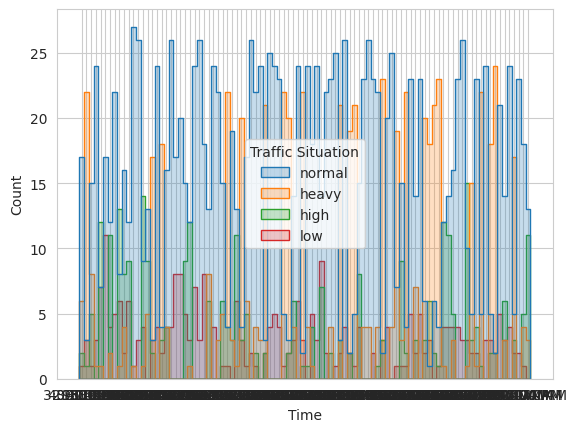

In [ ]:
sns.histplot(train, x="Time", hue="Traffic Situation", element="step")

<Axes: xlabel='Date', ylabel='Count'>

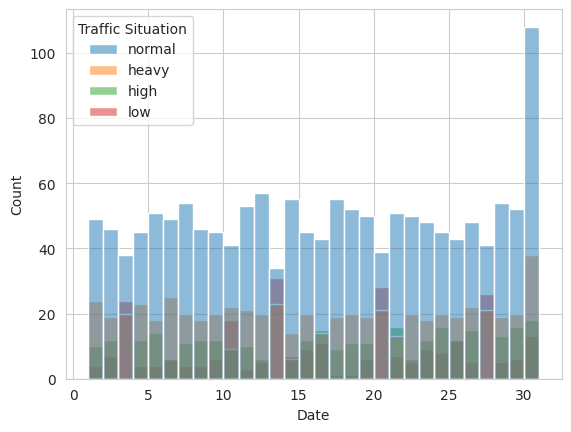

In [ ]:
sns.histplot(train, x="Date", hue="Traffic Situation", bins=30)

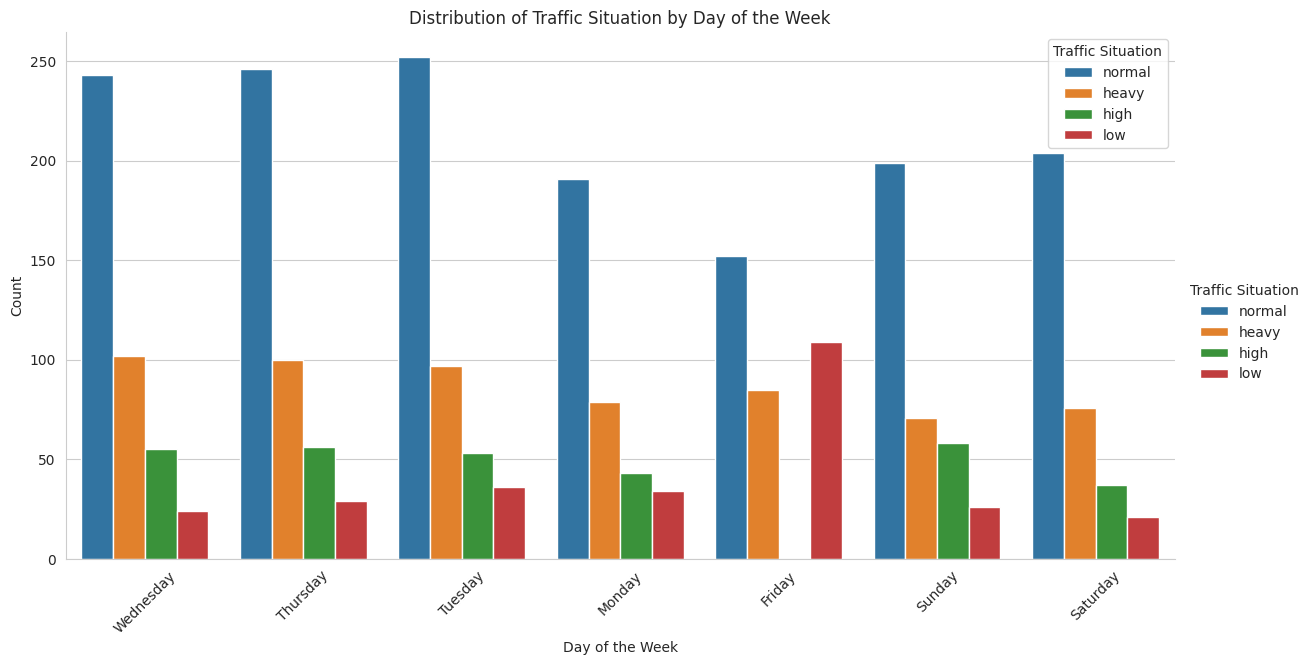

In [ ]:
# Creating a count plot to show the distribution of traffic situations by day of the week
sns.catplot(
    data=train,
    x='Day of the week',        # X-axis representing the day of the week
    hue='Traffic Situation',    # Color by traffic situation
    kind='count',               # Using count plot to show the number of occurrences
    palette='tab10',            # to Select a color palette
    height=6,                   # to Set the height of the plot
    aspect=2                    # to Set the aspect ratio (width/height)
)

# Adding title and labels to the plot
plt.title('Distribution of Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)        # Rotating x-axis labels for better readability
plt.legend(title='Traffic Situation')  # Adding legend with title
plt.show()

<Axes: xlabel='CarCount', ylabel='Count'>

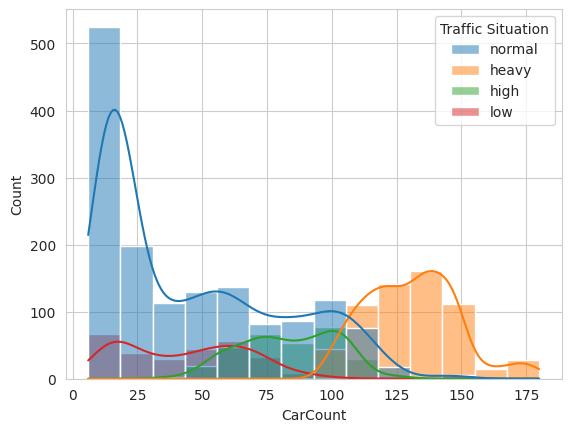

In [ ]:
sns.histplot(train,x='CarCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BikeCount', ylabel='Count'>

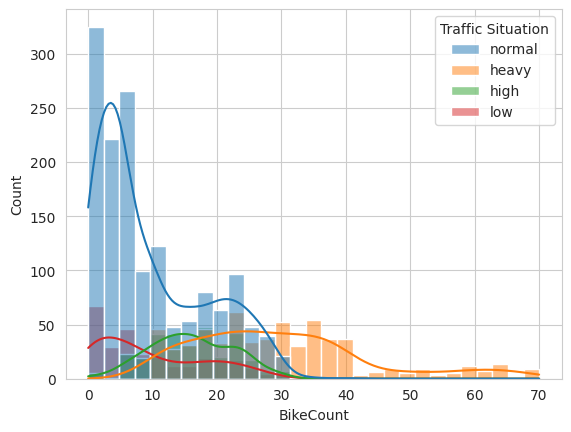

In [ ]:
sns.histplot(train,x='BikeCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BusCount', ylabel='Count'>

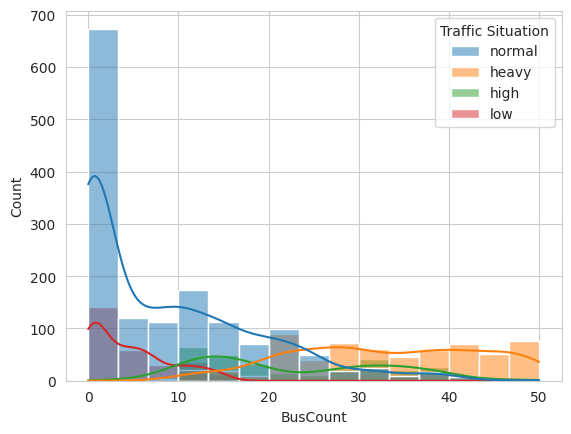

In [ ]:
sns.histplot(train,x='BusCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='TruckCount', ylabel='Count'>

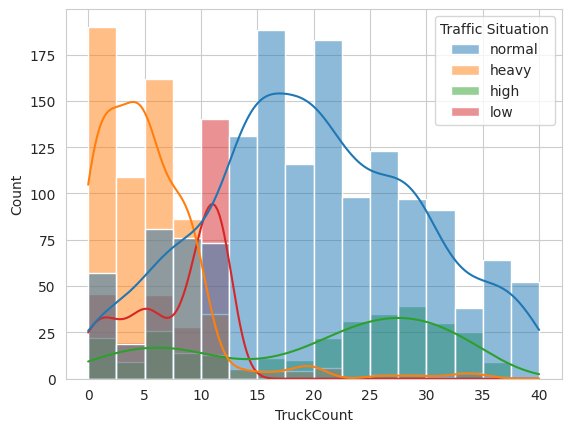

In [ ]:
sns.histplot(train,x='TruckCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='Total', ylabel='Count'>

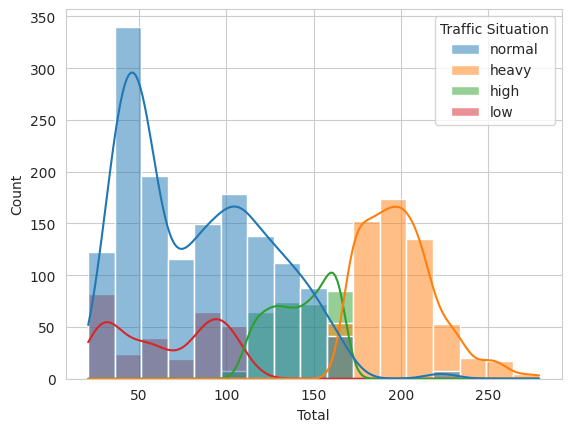

In [ ]:
sns.histplot(train,x='Total',hue='Traffic Situation',kde=True)

Preprocessing

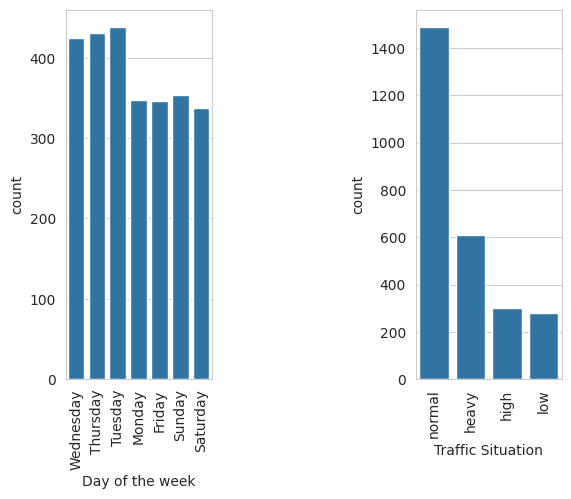

In [ ]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Day of the week"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = train["Traffic Situation"])
plotter.xticks(rotation = 90);
plt.show()

In [ ]:
df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,3:00:00 PM,18,3,14,16,9,14,53,1
929,4:15:00 PM,19,4,104,31,37,6,178,3
2170,2:30:00 PM,1,3,91,22,34,8,155,2
2702,3:30:00 AM,7,2,18,2,1,27,48,1
2676,9:00:00 PM,6,1,105,14,13,32,164,2
...,...,...,...,...,...,...,...,...,...
1921,12:15:00 AM,30,1,19,2,0,22,43,1
229,9:15:00 AM,12,4,24,18,37,18,97,1
1835,2:45:00 AM,29,7,19,2,1,12,34,0
2216,2:00:00 AM,2,4,12,3,0,39,54,1


Feature Selection

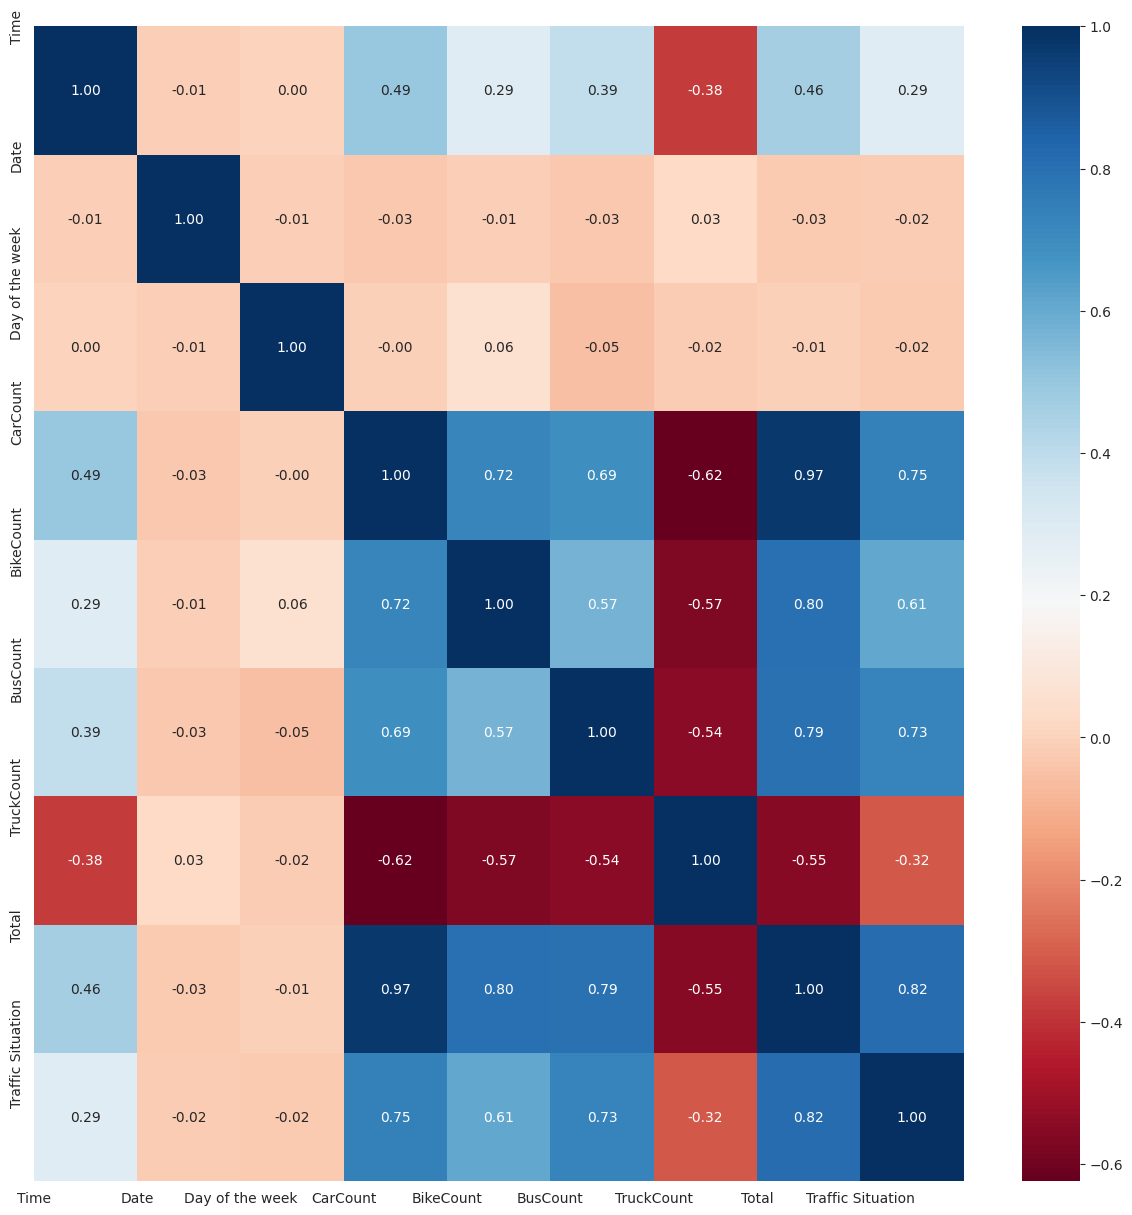

In [ ]:
train_temp=train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_temp['Time'] = le.fit_transform(train_temp['Time'])

corr = train_temp.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
train = train.drop(columns=["Day of the week","Date"],axis=1)
train


,Time,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,41,14,16,9,14,53,1
929,51,104,31,37,6,178,3
2170,37,91,22,34,8,155,2
2702,44,18,2,1,27,48,1
2676,89,105,14,13,32,164,2
...,...,...,...,...,...,...,...
1921,18,19,2,0,22,43,1
229,90,24,18,37,18,97,1
1835,38,19,2,1,12,34,0
2216,32,12,3,0,39,54,1


In [ ]:
X= train.drop(columns=["Traffic Situation"],axis=1)
y= train["Traffic Situation"]

In [ ]:
X_train=X
y_train=y

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5
0,-0.248684,-1.200271,0.082850,-0.442325,-0.123578,-1.023389
1,0.113949,0.767295,1.253470,1.510645,-0.877003,1.056847
2,-0.393737,0.483091,0.551098,1.301398,-0.688647,0.674083
3,-0.139894,-1.112824,-1.009729,-1.000316,1.100737,-1.106598
4,1.491955,0.789157,-0.073233,-0.163329,1.571628,0.823860
...,...,...,...,...,...,...
2673,-1.082740,-1.090962,-1.009729,-1.070065,0.629847,-1.189808
2674,1.528218,-0.981653,0.238932,1.510645,0.253134,-0.291146
2675,-0.357474,-1.090962,-1.009729,-1.000316,-0.311934,-1.339584
2676,-0.575054,-1.243995,-0.931688,-1.070065,2.230875,-1.006747


➡️ Standardize all features, i.e. Gaussian distribution. The mean of the data is 0 and the variance is 1.The appropriate time to use standardization is when the variance of some features is too large, so that the model can be converged quickly.

Target distribution

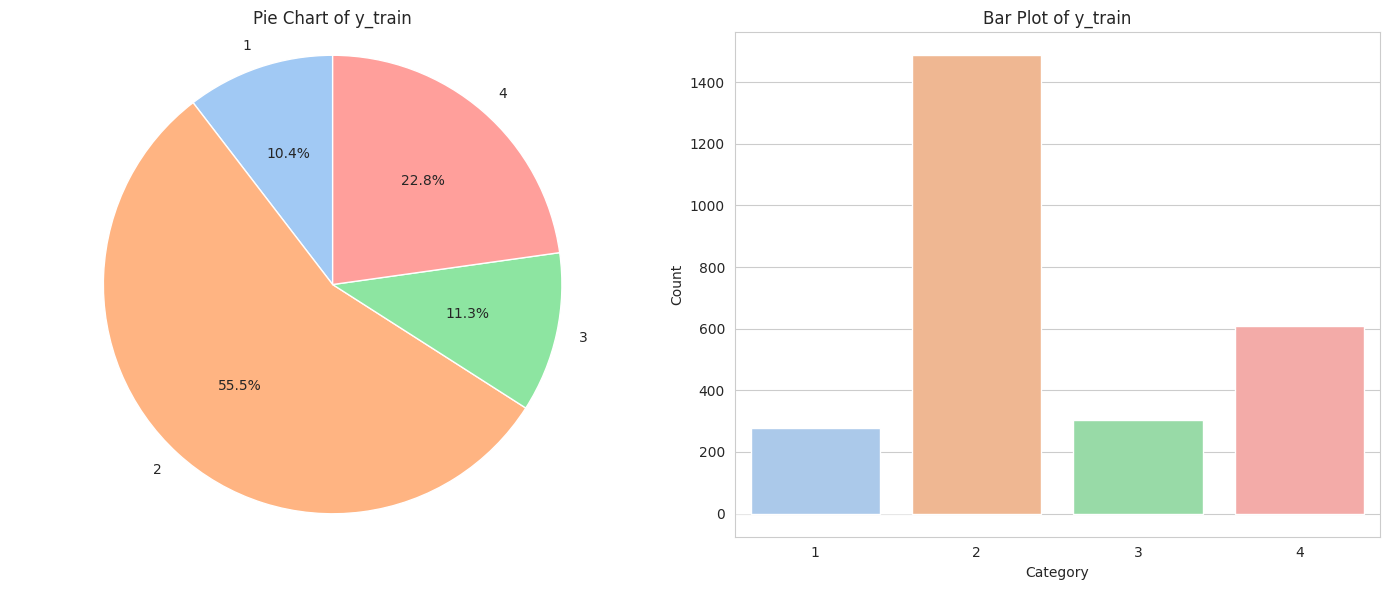

Skewness: 0.527934
Kurtosis: -0.860804


In [ ]:
# Compute frequency counts
counts = np.bincount(y_train)

# Define labels for the plots
class_labels = ['1', '2', '3', '4']
labels = [class_labels[i] for i in range(len(counts))]

# Set Seaborn style
sns.set_style("whitegrid")

# Creating a figure and axis for the subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
axs[0].pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(labels))
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axs[0].set_title('Pie Chart of y_train')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Bar Plot
sns.barplot(x=labels, y=counts, palette='pastel', ax=axs[1])
axs[1].set_title('Bar Plot of y_train')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (2142, 6)
Shape of X_eval:  (536, 6)
Shape of y_train:  (2142,)
Shape of y_eval (536,)


In [ ]:
y_train =pd.DataFrame(y_train)
y_eval =pd.DataFrame(y_eval)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100)

# Perform cross-validation
scores = cross_val_score(clf_rf, X_train, y_train, scoring='accuracy', cv=5)

# Print accuracy results
print("Accuracy: %0.2f (+/- %0.2f) [Random Forest]" % (scores.mean(), scores.std()))


Accuracy: 1.00 (+/- 0.00) [Random Forest]


In [ ]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf_rf.predict(X_eval)
accuracy = accuracy_score(y_pred, y_eval)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.07%


Predict test data

In [ ]:
test = test.reset_index(drop=True)
test_temp=test

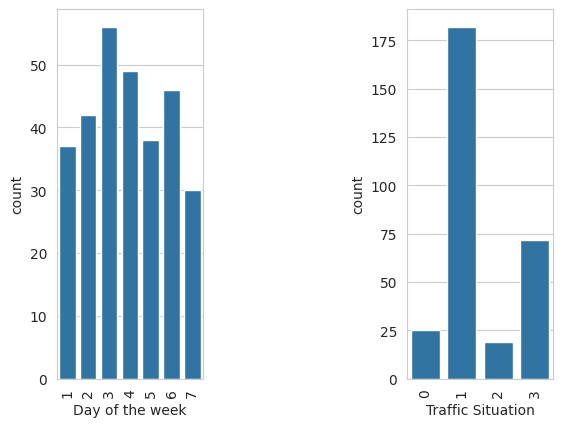

In [ ]:
plt.subplot(1, 3, 1)
sns.countplot(x = test["Day of the week"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = test["Traffic Situation"])
plotter.xticks(rotation = 90);
plt.show()

In [ ]:
df_temp=test_temp
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
test_temp=df_temp
test_temp

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,10:30:00 PM,23,1,12,0,0,22,34,1
1,9:30:00 AM,15,7,64,12,27,8,111,1
2,12:30:00 AM,18,3,20,5,0,10,35,0
3,5:00:00 AM,13,5,58,13,4,15,90,1
4,1:15:00 PM,20,5,161,50,10,0,221,3
...,...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97,1
294,10:00:00 PM,9,4,17,4,1,20,42,1
295,9:45:00 PM,21,7,82,16,14,34,146,2
296,6:00:00 PM,29,7,112,13,37,6,168,3


In [ ]:
test_temp = test_temp.drop(columns=['Traffic Situation'],axis=1)
test_temp

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10:30:00 PM,23,1,12,0,0,22,34
1,9:30:00 AM,15,7,64,12,27,8,111
2,12:30:00 AM,18,3,20,5,0,10,35
3,5:00:00 AM,13,5,58,13,4,15,90
4,1:15:00 PM,20,5,161,50,10,0,221
...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97
294,10:00:00 PM,9,4,17,4,1,20,42
295,9:45:00 PM,21,7,82,16,14,34,146
296,6:00:00 PM,29,7,112,13,37,6,168


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_temp['Time'] = le.fit_transform(test_temp['Time'])
test_temp=test_temp.drop(columns=['Day of the week',"Date"],axis=1)
test_temp

,Time,CarCount,BikeCount,BusCount,TruckCount,Total
0,5,12,0,0,22,34
1,87,64,12,27,8,111
2,20,20,5,0,10,35
3,55,58,13,4,15,90
4,27,161,50,10,0,221
...,...,...,...,...,...,...
293,55,70,6,7,14,97
294,1,17,4,1,20,42
295,90,82,16,14,34,146
296,63,112,13,37,6,168


In [ ]:
test_row = test_temp.shape[0]
test_row

298

In [ ]:
import_train = X.reset_index(drop=True)
import_train

,Time,CarCount,BikeCount,BusCount,TruckCount,Total
0,41,14,16,9,14,53
1,51,104,31,37,6,178
2,37,91,22,34,8,155
3,44,18,2,1,27,48
4,89,105,14,13,32,164
...,...,...,...,...,...,...
2673,18,19,2,0,22,43
2674,90,24,18,37,18,97
2675,38,19,2,1,12,34
2676,32,12,3,0,39,54


In [ ]:
Row_Number=test_row
X_test_target1_df=import_train._append(test_temp,ignore_index=True)

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_test_target1_df = StandardScaler.fit_transform(X_test_target1_df)
test_pred_target0= pd.DataFrame(X_test_target1_df)
test_pred_target0 = pd.DataFrame(test_pred_target0).tail(Row_Number)
test_pred_target0 = test_pred_target0.reset_index(drop=True)
test_pred_target0

,0,1,2,3,4,5
0,-1.536183,-1.236756,-1.161302,-1.065552,0.629601,-1.332963
1,1.437268,-0.102449,-0.227112,0.817348,-0.690898,-0.053479
2,-0.992259,-1.062247,-0.772056,-1.065552,-0.502255,-1.316347
3,0.276897,-0.233331,-0.149263,-0.786604,-0.030648,-0.402429
4,-0.738428,2.013469,2.731155,-0.368182,-1.445469,1.774355
...,...,...,...,...,...,...
293,0.276897,0.028432,-0.694207,-0.577393,-0.124969,-0.286113
294,-1.681229,-1.127688,-0.849905,-0.995815,0.440959,-1.200030
295,1.546052,0.290195,0.084284,-0.089233,1.761458,0.528104
296,0.566989,0.944603,-0.149263,1.514719,-0.879540,0.893671


In [ ]:
test_pred_target0.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0


In [ ]:
test_predict= clf_rf.predict(test_pred_target0.values)

In [ ]:
#DataFrame
Stacking_predict_df=pd.DataFrame(test_predict)

#rename lable
Stacking_predict_df=Stacking_predict_df.set_axis(axis=1,labels=['test_pred'])

#merge predict
test_pred=test.merge(Stacking_predict_df,how='inner',left_index=True,right_index=True)
test_pred

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,test_pred
0,10:30:00 PM,23,1,12,0,0,22,34,1,1
1,9:30:00 AM,15,7,64,12,27,8,111,1,1
2,12:30:00 AM,18,3,20,5,0,10,35,0,0
3,5:00:00 AM,13,5,58,13,4,15,90,1,1
4,1:15:00 PM,20,5,161,50,10,0,221,3,3
...,...,...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97,1,1
294,10:00:00 PM,9,4,17,4,1,20,42,1,1
295,9:45:00 PM,21,7,82,16,14,34,146,2,2
296,6:00:00 PM,29,7,112,13,37,6,168,3,3


In [ ]:
stacking_acc = accuracy_score(test_pred['Traffic Situation'], test_pred['test_pred'])
print("accuracy : {0:.3f}%".format(stacking_acc * 100))


accuracy : 99.329%


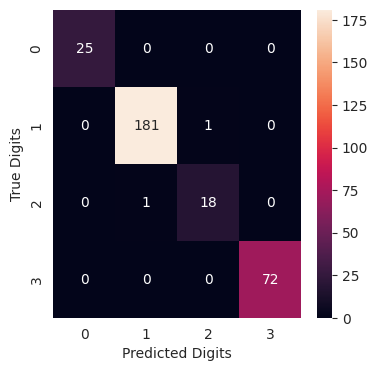

In [ ]:
cm = confusion_matrix(test_pred['Traffic Situation'], test_pred['test_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()